# Validation regularization and callbacks

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print(np.__version__)
print(tf.__version__)

1.18.1
2.3.1


## Validation sets
### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()
print(diabetes_datasets['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
# Save the input and target variables
print(diabetes_datasets.keys())

data = diabetes_datasets['data']
target = diabetes_datasets['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
# Normalize the target data
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compo;e the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [11]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.7880 - mae: 0.7052


[0.7880353927612305, 0.7051531672477722]

### Plot the learning curves

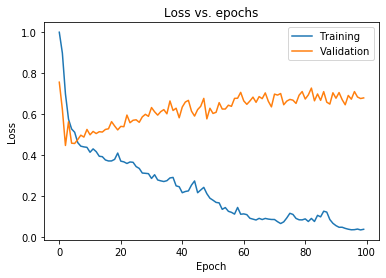

In [12]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Model regularization
### Adding regularization with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],), 
                                                   kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Rebuild the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Train the model
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target)

2/2 [==============================] - 0s 2ms/step - loss: 0.5609 - mae: 0.5921


[0.5609083771705627, 0.5921123623847961]

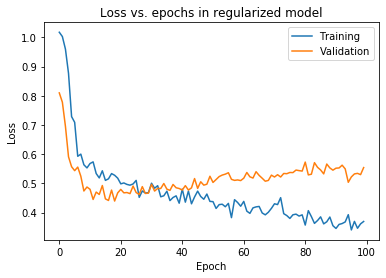

In [19]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs in regularized model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Batch Normalization

In this reading we will look at incorporating batch normalisation into our models and look at an example of how we do this in practice.

In [21]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

### Defining the model
We can implement batch normalisation into our model by adding it in the same way as any other layer.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [23]:
model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
________________________________________________

Recall that there are some parameters and hyperparameters associated with batch normalisation.

* The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

* The hyperparameter **$\epsilon$** is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

* The parameters **$\beta$** and **$\gamma$** are used to implement an affine transformation after normalisation. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

### Customising parameters
These can all be changed (along with various other properties) by adding optional arguments to `tf.keras.layers.BatchNormalization()`.

We can also specify the axis for batch normalisation. By default, it is set as -1.

In [25]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [26]:
model.add(Dense(1))

### Compile and fit the model

Let's now compile and fit our model with batch normalisation, and track the progress on training and validation sets.

In [27]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

Now we fit the model to the data.

In [29]:
history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, 
                    batch_size=64,verbose=False)

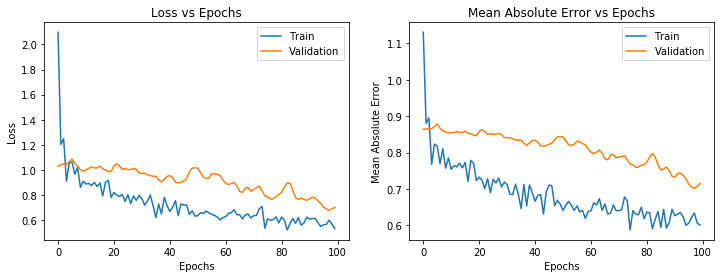

In [32]:
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

### Further reading and resources
* https://keras.io/layers/normalization/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization

## Introduction to callbacks
### Example training callback

In [34]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")

In [38]:
model = get_regularized_model(1e-5, 0.3)
model.compile(optimizer='adam', loss='mse')

### Train the model with the callback

In [39]:
history = model.fit(train_data, train_target, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [40]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
            
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [41]:
# Evaluate the model
model.evaluate(test_data, test_target, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.8280712366104126

In [42]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
            
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

In [43]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.05459693],
       [-0.03371279],
       [-0.03915209],
       [-0.0267226 ],
       [ 0.13677026],
       [-0.03636135],
       [-0.02885315],
       [ 0.04791703],
       [-0.03457917],
       [-0.03951466],
       [ 0.08794071],
       [-0.03729593],
       [-0.02124045],
       [ 0.07995196],
       [ 0.02661199],
       [-0.00568531],
       [-0.02873256],
       [-0.02773619],
       [-0.03254315],
       [-0.02413205],
       [-0.01274556],
       [ 0.09788238],
       [-0.00109389],
       [-0.0285228 ],
       [ 0.08399052],
       [ 0.03165962],
       [ 0.0465059 ],
       [ 0.111439  ],
       [ 0.0508196 ],
       [ 0.00209698],
       [ 0.12483195],
       [ 0.05982259],
       [ 0.04116733],
       [-0.00793656],
       [-0.03959471],
       [-0.03941603],
       [ 0.00238332],
       [-0.01159868],
       [-0.01170786],
       [-0.0092503 ],
       [ 0.01660866],
       [-0.03973877],
       [ 0.01351906],
       [ 0.03054223],
       [-0.03544634]], dtype=flo